In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.simplefilter("ignore")

In [3]:
# Loading the dataset
data = pd.read_csv("language_detection_model.csv")

In [4]:
#is used to display first 10 lines of data
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [5]:
# value count for each language(unique words in each language)
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [6]:
# separating the independent and dependant features
X = data["Text"] #independent variable
y = data["Language"] #dependent variable

In [7]:
# converting categorical variables to numerical
#label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
#preprocessing
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)

In [9]:
# using "bag of words" model that uses countvectorizer->counts frequency of each word

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [10]:
X.shape

(10347, 39417)

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [12]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [13]:
# prediction 
y_pred = model.predict(x_test)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [15]:
print("Accuracy is :",ac)

Accuracy is : 0.9753623188405797


In [16]:
# classification report
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       100
           1       0.99      0.92      0.95        90
           2       1.00      0.97      0.99       108
           3       0.87      1.00      0.93       273
           4       0.99      0.99      0.99       224
           5       1.00      0.97      0.98        93
           6       1.00      0.97      0.99        75
           7       1.00      1.00      1.00        12
           8       0.99      0.99      0.99       138
           9       1.00      0.97      0.99        76
          10       0.99      0.97      0.98       112
          11       1.00      0.98      0.99       143
          12       1.00      0.98      0.99       138
          13       0.99      0.97      0.98       171
          14       0.97      0.97      0.97       134
          15       1.00      0.96      0.98        93
          16       1.00      0.93      0.97        90

    accuracy              

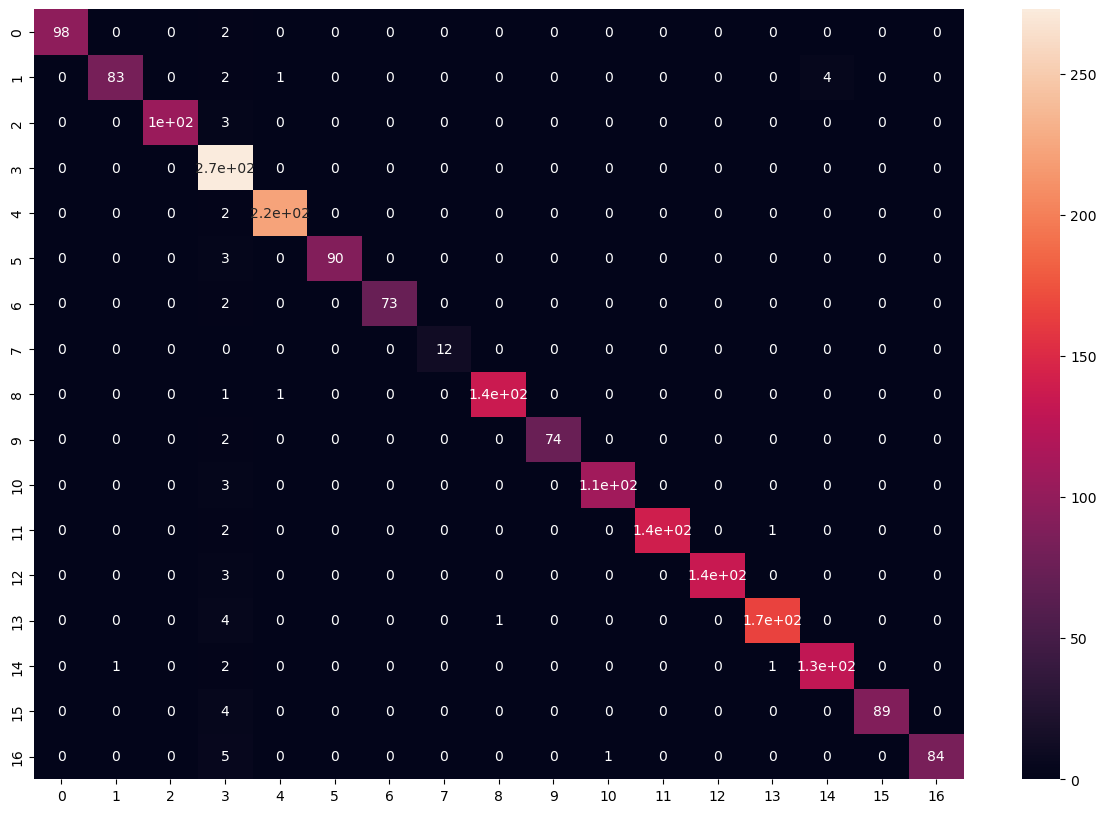

In [17]:
# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [18]:
# saving both cv and model
pickle.dump(cv, open("transform.pkl", "wb"))
pickle.dump(model, open("model.pkl", "wb"))

In [19]:
def predict(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print("The language is", lang[0])


In [20]:
input_text = "l love my country"


predict(input_text)


The language is English
